# <font color=red> 5.1. Input and output: neuroimaging data representation

<font color=blue>Using ~ rather than specifying the details of the path is good practice, as it will make it more likely that your script work on different computers

In [7]:
ls /Users/amr/nilearn_data/adhd/data/*

/Users/amr/nilearn_data/adhd/data/0010042:
0010042_regressors.csv
0010042_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0010064:
0010064_regressors.csv
0010064_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0010128:
0010128_regressors.csv
0010128_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0021019:
0021019_regressors.csv
0021019_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0023008:
0023008_regressors.csv
0023008_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0023012:
0023012_regressors.csv
0023012_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0027011:
0027011_regressors.csv
0027011_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0027018:
0027018_regressors.csv
0027018_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd/data/0027034:
0027034_regressors.csv
0027034_rest_tshift_RPI_voreg_mni.nii.gz

/Users/amr/nilearn_data/adhd

In [9]:
from nilearn import image, plotting

In [12]:

result = image.smooth_img('/Users/amr/nilearn_data/adhd/data/*/*8_rest_tshift_RPI_voreg_mni.nii.gz', fwhm=6.)

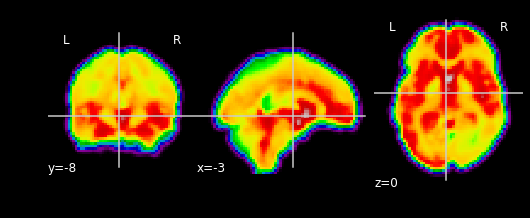

In [16]:
plot = plotting.plot_epi(image.index_img(result, 0))

In [17]:
plot.close()

In [15]:
result.shape

(61, 73, 61, 1456)

In [18]:
from nilearn import datasets

In [20]:
datasets.get_data_dirs()

['/Users/amr/nilearn_data']

In [23]:
cd ~/Documents/nilearn/

/Users/amr/Documents/nilearn


In [27]:
from nilearn import image, plotting
img = image.load_img('1st_subj_avg.nii.gz')

In [29]:
plot = plotting.plot_anat(img)
plot.close()

In [52]:
img.get_header()

/Users/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  """Entry point for launching an IPython kernel.


In [32]:
!fslhd 1st_subj_avg.nii.gz


filename	1st_subj_avg.nii.gz
size of header	348
data_type	FLOAT32
dim0		3
dim1		61
dim2		73
dim3		61
dim4		1
dim5		1
dim6		1
dim7		1
vox_units	Unknown
time_units	Unknown
datatype	16
nbyper		4
bitpix		32
pixdim0		-1.000000
pixdim1		3.000000
pixdim2		3.000000
pixdim3		3.000000
pixdim4		1.000000
pixdim5		1.000000
pixdim6		1.000000
pixdim7		1.000000
vox_offset	352
cal_max		0.000000
cal_min		0.000000
scl_slope	1.000000
scl_inter	0.000000
phase_dim	0
freq_dim	0
slice_dim	0
slice_name	Unknown
slice_code	0
slice_start	0
slice_end	0
slice_duration	0.000000
toffset		0.000000
intent		Unknown
intent_code	0
intent_name	
intent_p1	0.000000
intent_p2	0.000000
intent_p3	0.000000
qform_name	Unknown
qform_code	0
qto_xyz:1	-3.000000 0.000000 -0.000000 90.000000 
qto_xyz:2	0.000000 3.000000 -0.000000 -126.000000 
qto_xyz:3	0.000000 0.000000 3.000000 -72.000000 
qto_xyz:4	0.000000 0.000000 0.000000 1.000000 
qform_xorient	Right-to-Left
qform_yorient	Posterior-to-Anterior
qform_zorient	Inferior-to-Superior


### <font color=green>8.5.7. Resample an image to a template

In [53]:
from nilearn import plotting, image, datasets

In [55]:
template = datasets.load_mni152_template()
motor_images = datasets.fetch_neurovault_motor_task()

stat_image = motor_images.images[0]

In [56]:
resampled_stat_img = image.resample_to_img(stat_image, template)

In [58]:
tmap_img = image.load_img(stat_image)
original_shape = tmap_img.shape
original_affine = tmap_img.affine

resampled_shape = resampled_stat_img.shape
resampled_affine = resampled_stat_img.affine

template_img = image.load_img(template)
template_shape = template_img.shape
template_affine = template_img.affine



In [59]:
print("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape: {1}
- Template image shape       : {2}
""".format(original_shape, resampled_shape, template_shape))

print("""Affine comparison:
- Original t-map image affine :\n {0}
- Resampled t-map image affine:\n {1}
- Template image affine       :\n {2}
""".format(original_affine, resampled_affine, template_affine))

Shape comparison:
- Original t-map image shape : (53, 63, 46)
- Resampled t-map image shape: (91, 109, 91)
- Template image shape       : (91, 109, 91)

Affine comparison:
- Original t-map image affine :
 [[  -3.    0.    0.   78.]
 [   0.    3.    0. -112.]
 [   0.    0.    3.  -50.]
 [   0.    0.    0.    1.]]
- Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



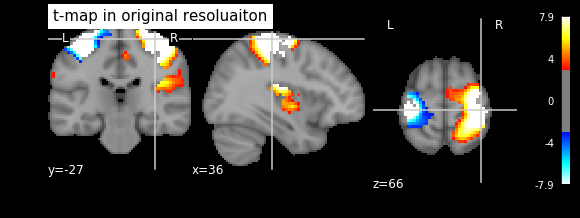

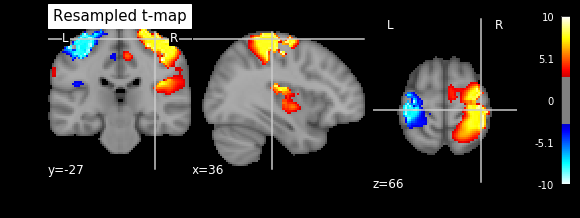

In [61]:
plotting.plot_stat_map(stat_image, bg_img=template, 
                       cut_coords=(36, -27, 66), threshold=3, title='t-map in original resoluaiton')

plotting.plot_stat_map(resampled_stat_img,
                       bg_img=template,
                       cut_coords=(36, -27, 66),
                       threshold=3,
                       title="Resampled t-map")

In [62]:
from nilearn import masking

In [63]:
adhd_data = datasets.fetch_adhd(n_subjects=1)

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [78]:
func_filename = adhd_data.func[0]

In [65]:
mask_img = masking.compute_epi_mask(func_filename)

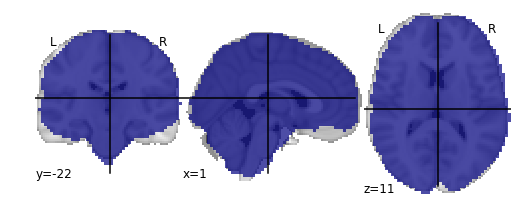

In [67]:

plotting.plot_roi(mask_img)

In [68]:
masked_data = masking.apply_mask(func_filename, mask_img)

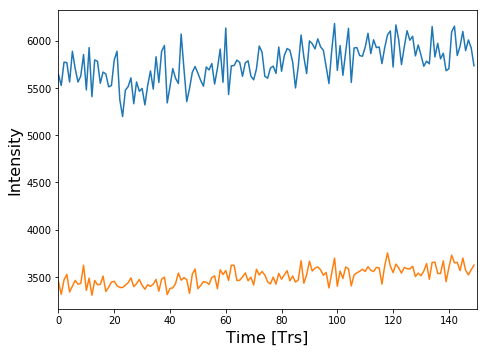

In [69]:
plt.figure(figsize=(7,5))
plt.plot(masked_data[:150, :2])
plt.xlabel('Time [Trs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

In [79]:

masked_data.shape

(176, 62546)

In [80]:
from nilearn import input_data

In [83]:
epi_filename = func_filename

In [84]:
epi_image = image.index_img(epi_filename, slice(0,100))

In [90]:
mean_img = image.mean_img(epi_filename)

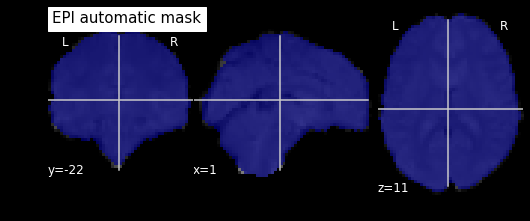

In [91]:
masker = input_data.NiftiMasker(mask_strategy='epi')
masker.fit(epi_image)
plotting.plot_roi(masker.mask_img_, mean_img, title='EPI automatic mask')

In [92]:
input_data.NiftiMasker?

In [93]:

mean_img.shape

(61, 73, 61)

### 8.5.6. Simple example of NiftiMasker use 

In [94]:
from nilearn.input_data import NiftiMasker

In [95]:
nifti_masker = NiftiMasker(standardize=True, mask_strategy='epi',
                          memory='nilearn_cache/', memory_level=2, smoothing_fwhm=8)

nifti_masker.fit(func_filename)
mask_img = nifti_masker.mask_img_

In [96]:
mean_func_img = mean_img

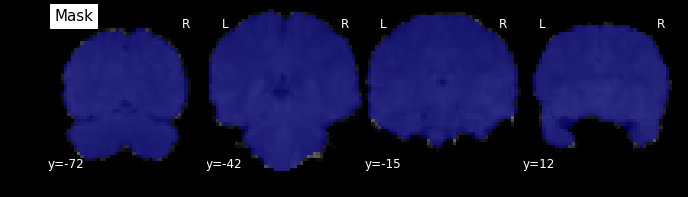

In [97]:
plotting.plot_roi(mask_img, mean_func_img, display_mode='y', cut_coords=4, title='Mask')

In [100]:
fmri_masked = nifti_masker.fit_transform(func_filename)


In [101]:
fmri_masked.shape

(176, 62546)

In [102]:
from sklearn.decomposition import FastICA
n_components = 10
ica = FastICA(n_components=n_components, random_state=42)
components_masked = ica.fit_transform(fmri_masked.T).T

In [103]:
components = nifti_masker.inverse_transform(components_masked)


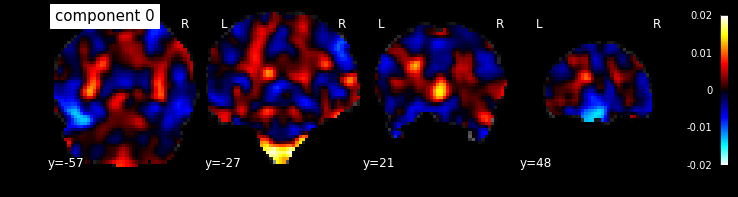

In [105]:
plot = plotting.plot_stat_map(image.index_img(components, 0), mean_func_img, display_mode='y', 
                      cut_coords=4, title='component 0')

### 8.5.9. Understanding NiftiMasker and mask computation 

In [106]:
miyawaki_dataset = datasets.fetch_miyawaki2008()


Dataset created in /Users/amr/nilearn_data/miyawaki2008



Downloaded 161069109 of 161069109 bytes (100.0%,    0.0s remaining) ...done. (20 seconds, 0 min)
Extracting data from /Users/amr/nilearn_data/miyawaki2008/4356183cd5ae215342603c6edeb89f54/miyawaki2008.tgz..... done.


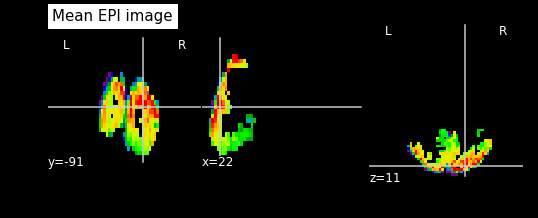

In [107]:
miyawaki_filename = miyawaki_dataset.func[0]
miyawaki_mean_img = image.mean_img(miyawaki_filename)
plotting.plot_epi(miyawaki_mean_img, title='Mean EPI image')

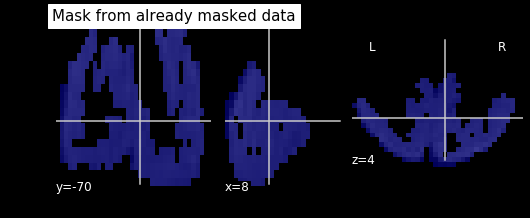

In [109]:
masker = NiftiMasker()
masker.fit(miyawaki_filename)

plotting.plot_roi(masker.mask_img_, miyawaki_mean_img, title='Mask from already masked data')

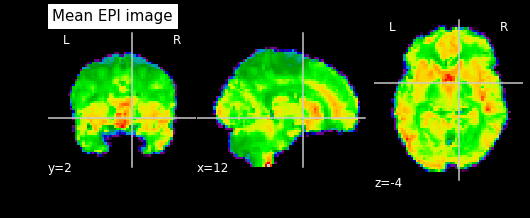

In [111]:
epi_img = image.index_img(epi_filename, slice(0, 100))
mean_img = image.mean_img(epi_img)
plotting.plot_epi(mean_img, title='Mean EPI image')

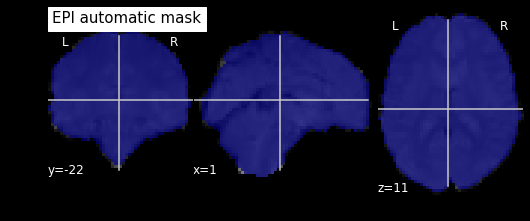

In [112]:
masker = NiftiMasker(mask_strategy='epi')
masker.fit(epi_img)
plotting.plot_roi(masker.mask_img_, mean_img, title='EPI automatic mask')

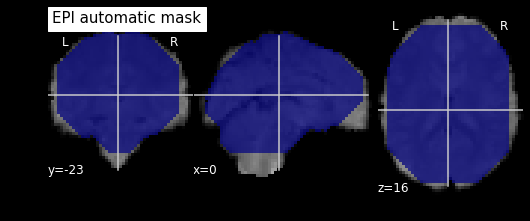

In [113]:
masker = NiftiMasker(mask_strategy='epi', mask_args=dict(opening=10))
masker.fit(epi_img)
plotting.plot_roi(masker.mask_img_, mean_img, title='EPI automatic mask')

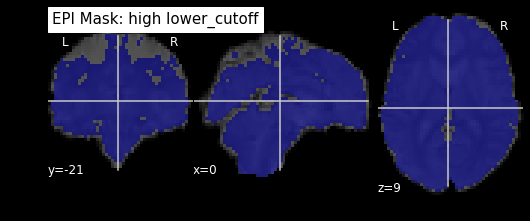

In [115]:
masker = NiftiMasker(mask_strategy='epi',
                     mask_args=dict(upper_cutoff=.9, lower_cutoff=.8,
                                    opening=False))
masker.fit(epi_img)
plotting.plot_roi(masker.mask_img_, mean_img,
         title='EPI Mask: high lower_cutoff')

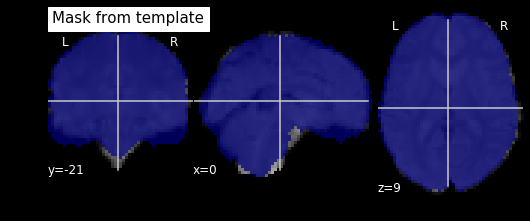

In [116]:
masker = NiftiMasker(mask_strategy='template')
masker.fit(epi_img)
plotting.plot_roi(masker.mask_img_, mean_img,
         title='Mask from template')

In [117]:
trended = NiftiMasker(mask_strategy='epi')
detrended = NiftiMasker(mask_strategy='epi', detrend=True)

trended_data = trended.fit_transform(epi_image)
detrended_data = detrended.fit_transform(epi_image)


In [118]:
import numpy as np

In [120]:
print('trended: mean {0}, std {1}'.format(np.mean(trended_data), np.std(trended_data)))

print('detrended: mean {0}, std {1}'.format(np.mean(detrended_data), np.std(detrended_data)))

trended: mean 9649.837890625, std 2132.18212890625
detrended: mean 4.107489530724706e-06, std 139.16221618652344


### 8.4.5. Extracting brain signal from spheres 

In [121]:
from nilearn import datasets
adhd_datasets = datasets.fetch_adhd(n_subjects=1)

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [122]:
dmn_coords = [(0, -52, 18),(-46, -68, 32),(46, -68, 32),(1, 50, -5)]

labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex'
]

In [123]:
from nilearn.input_data import NiftiSpheresMasker

In [124]:
masker = NiftiSpheresMasker(dmn_coords, radius=8, detrend=True, standardize=True,
                           low_pass=0.1, high_pass=0.01, t_r=2.5,
                           memory='nilearn_cache/', memory_level=1, verbose=2)
func_filename = adhd_datasets.func[0]
confound_filename = adhd_datasets.confounds[0]

time_series = masker.fit_transform(func_filename, confounds=[confound_filename])

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 2.5}, confounds=['/Users/amr/nilearn_data/adhd/data/0010042/0010042_regressors.csv'], dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=2)
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
_______________________

/Users/amr/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [125]:
import matplotlib.pyplot as plt

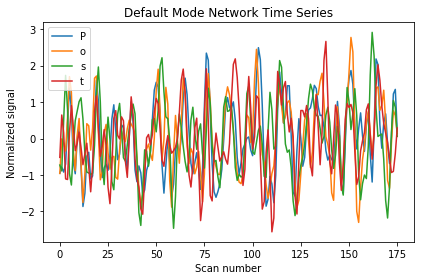

In [127]:
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)
plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

In [128]:
from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform([time_series])[0]

In [129]:
from nilearn import plotting

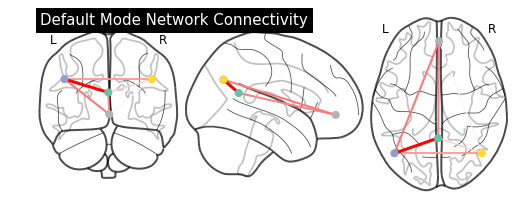

In [130]:
plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                        title='Default Mode Network Connectivity')

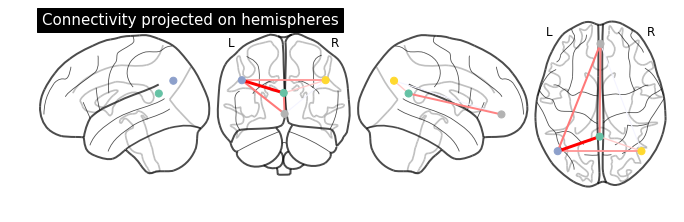

In [131]:
plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                        title='Connectivity projected on hemispheres',
                        display_mode='lyrz')

In [132]:
view = plotting.view_connectome(partial_correlation_matrix, dmn_coords)

In [133]:
view